In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix_df = pd.read_csv("netflix_data.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [5]:
duplicates = netflix_df.duplicated().sum()
print(duplicates)

0


In [6]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 413.7+ KB


Filtering the data for movies released in the 1990s

In [7]:
netflix_df['type'].value_counts()

Movie      4677
TV Show     135
Name: type, dtype: int64

In [8]:
movies_90s = netflix_df[
    (netflix_df['type'] == 'Movie') & (netflix_df['release_year'] >= 1990)
    & (netflix_df['release_year'] <= 1999)]

movies_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,2019-12-01,1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,2020-12-01,1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [9]:
movies_90s.count()

show_id         183
type            183
title           183
director        183
cast            183
country         183
date_added      183
release_year    183
duration        183
description     183
genre           183
dtype: int64

In [10]:
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
tv_shows.head()
tv_shows['release_year'].value_counts()
# There is not enough data to analyze TV shows from the 90s.

2020    34
2019    24
2017    18
2018    17
2016    10
2015     9
2014     7
2012     4
2013     3
2006     3
2011     2
2010     1
1990     1
2001     1
2021     1
Name: release_year, dtype: int64

## Movies Released by Year

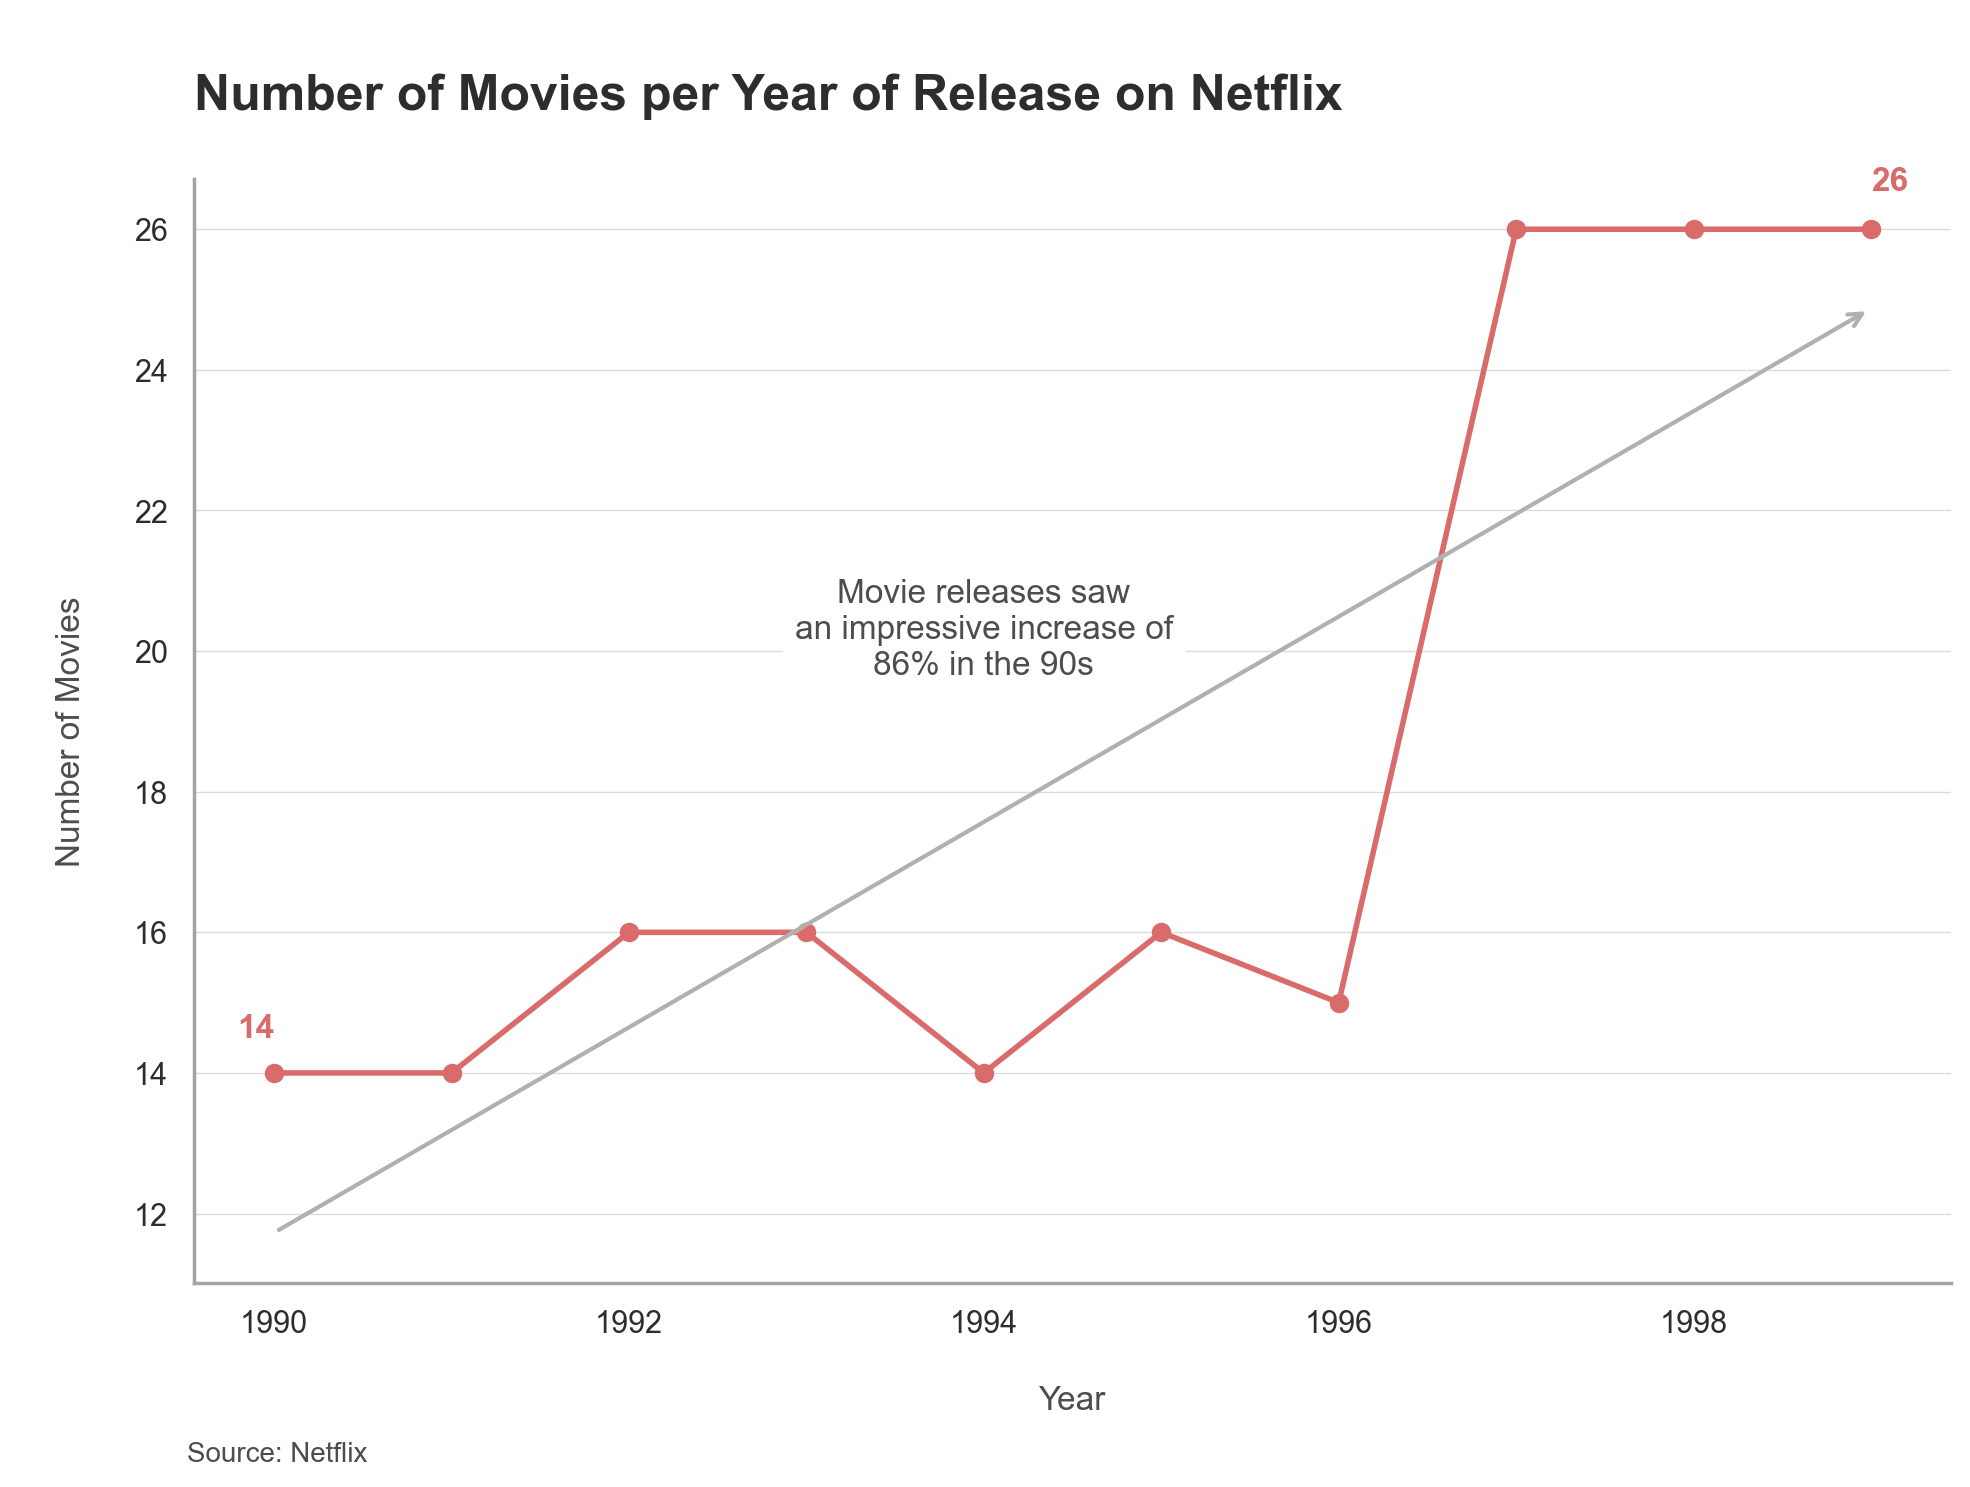

In [47]:
import numpy as np

year_counts = movies_90s['release_year'].value_counts().sort_index()

# Growth Percentage
first_year_count = year_counts.iloc[0]
last_year_count = year_counts.iloc[-1]
growth_percentage = ((last_year_count - first_year_count) / first_year_count) * 100
growth_percentage_rounded = round(growth_percentage)

sns.set_theme(style="white")

plt.figure(figsize=(10, 7.5))

plt.plot(year_counts.index, year_counts.values, marker='o', color='#D96B6B', linewidth=2)

plt.title('\nNumber of Movies per Year of Release on Netflix\n', fontsize=18, loc='left', 
          fontweight='bold', color='#2D2D2D')

plt.xlabel('\nYear\n', fontsize=12, color='#4D4D4D')
plt.ylabel('\nNumber of Movies\n', fontsize=12, color='#4D4D4D')

plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='#DCDCDC', axis='y')
plt.gca().spines['bottom'].set_color('#A3A3A3')
plt.gca().spines['left'].set_color('#A3A3A3')

plt.tick_params(axis='x', colors='#2D2D2D')
plt.tick_params(axis='y', colors='#2D2D2D')

sns.despine(top=True, right=True)

x = year_counts.index
y = year_counts.values
z = np.polyfit(x, y, 1)  
p = np.poly1d(z)  
#plt.plot(x, p(x), linestyle='--', color='#B0B0B0', linewidth=1.5)
plt.plot(x, p(x), linestyle='--', color='#ffffff')
plt.annotate('', xy=(x[-1], p(x)[-1]), xytext=(x[0], p(x)[0]), 
             arrowprops=dict(facecolor='#606060', edgecolor='#B0B0B0', 
                             arrowstyle='->', lw=1.5))

plt.text(x[0], y[0] + 0.4, f'{y[0]}', fontsize=12, color='#D96B6B', ha='right', va='bottom', fontweight='bold')
plt.text(x[-1], y[-1] + 0.9, f'{y[-1]}', fontsize=12, color='#D96B6B', ha='left', va='top', fontweight='bold')

mid_x = (x[0] + x[-1]) / 2 -0.5  
mid_y = (y[0] + y[-1]) / 2 +0.3
plt.text(mid_x, mid_y, 
         f"Movie releases saw\n"
         f"an impressive increase of\n"
         f"{growth_percentage_rounded}% in the 90s", 
         fontsize=12, color='#4D4D4D', ha='center', va='center', 
         fontweight='normal', backgroundcolor='white')

plt.figtext(0.1, 0.02, 'Source: Netflix', ha='left', va='center', fontsize=10, color='#4D4D4D')

plt.tight_layout()
plt.show()

The graph shows a steady and **consistent increase** in the number of movies released throughout the 1990s, indicating a growing trend in movie production during this period. 

Notably, there is a significant **spike between 1996 and 1997**, followed by a period of **stability** from 1997 until the end of the decade.

What could have caused this sharp increase? Did the production volume from different countries influence this surge? Let's analyze the data on movies released by country to see if there is a similar pattern.

In [18]:
country_counts = movies_90s.groupby('country').size().sort_values(ascending=False)
country_counts

country
United States     99
India             34
United Kingdom    17
Hong Kong         11
Australia          5
France             5
Mexico             3
Germany            2
Japan              2
Argentina          1
Canada             1
Egypt              1
Poland             1
Thailand           1
dtype: int64

The gap between the United States and other countries is substantial, suggesting that the U.S. has a significant impact on the overall release data. India ranks second, with a notable difference compared to the third place, the United Kingdom.

Overall, the top three countries stand out with a clear distinction from the rest. To gain a broader understanding of movie releases in the 1990s, let's analyze the trends of these top three countries to see if we can uncover further insights.

In [19]:
top_3_countries = country_counts.head(3)
top_3_movies = movies_90s[movies_90s['country'].isin(top_3_countries.index)]
top_3_country_years = top_3_movies.groupby(['release_year', 'country']).size().unstack(fill_value=0)
top_3_country_years

country,India,United Kingdom,United States
release_year,,,
1990,4,0,7
1991,1,2,9
1992,1,3,6
1993,3,1,9
1994,4,2,6
1995,4,1,9
1996,3,1,11
1997,3,3,16
1998,5,2,14


Let's plot it to help us gain a better visualization of what's happening with the country data.

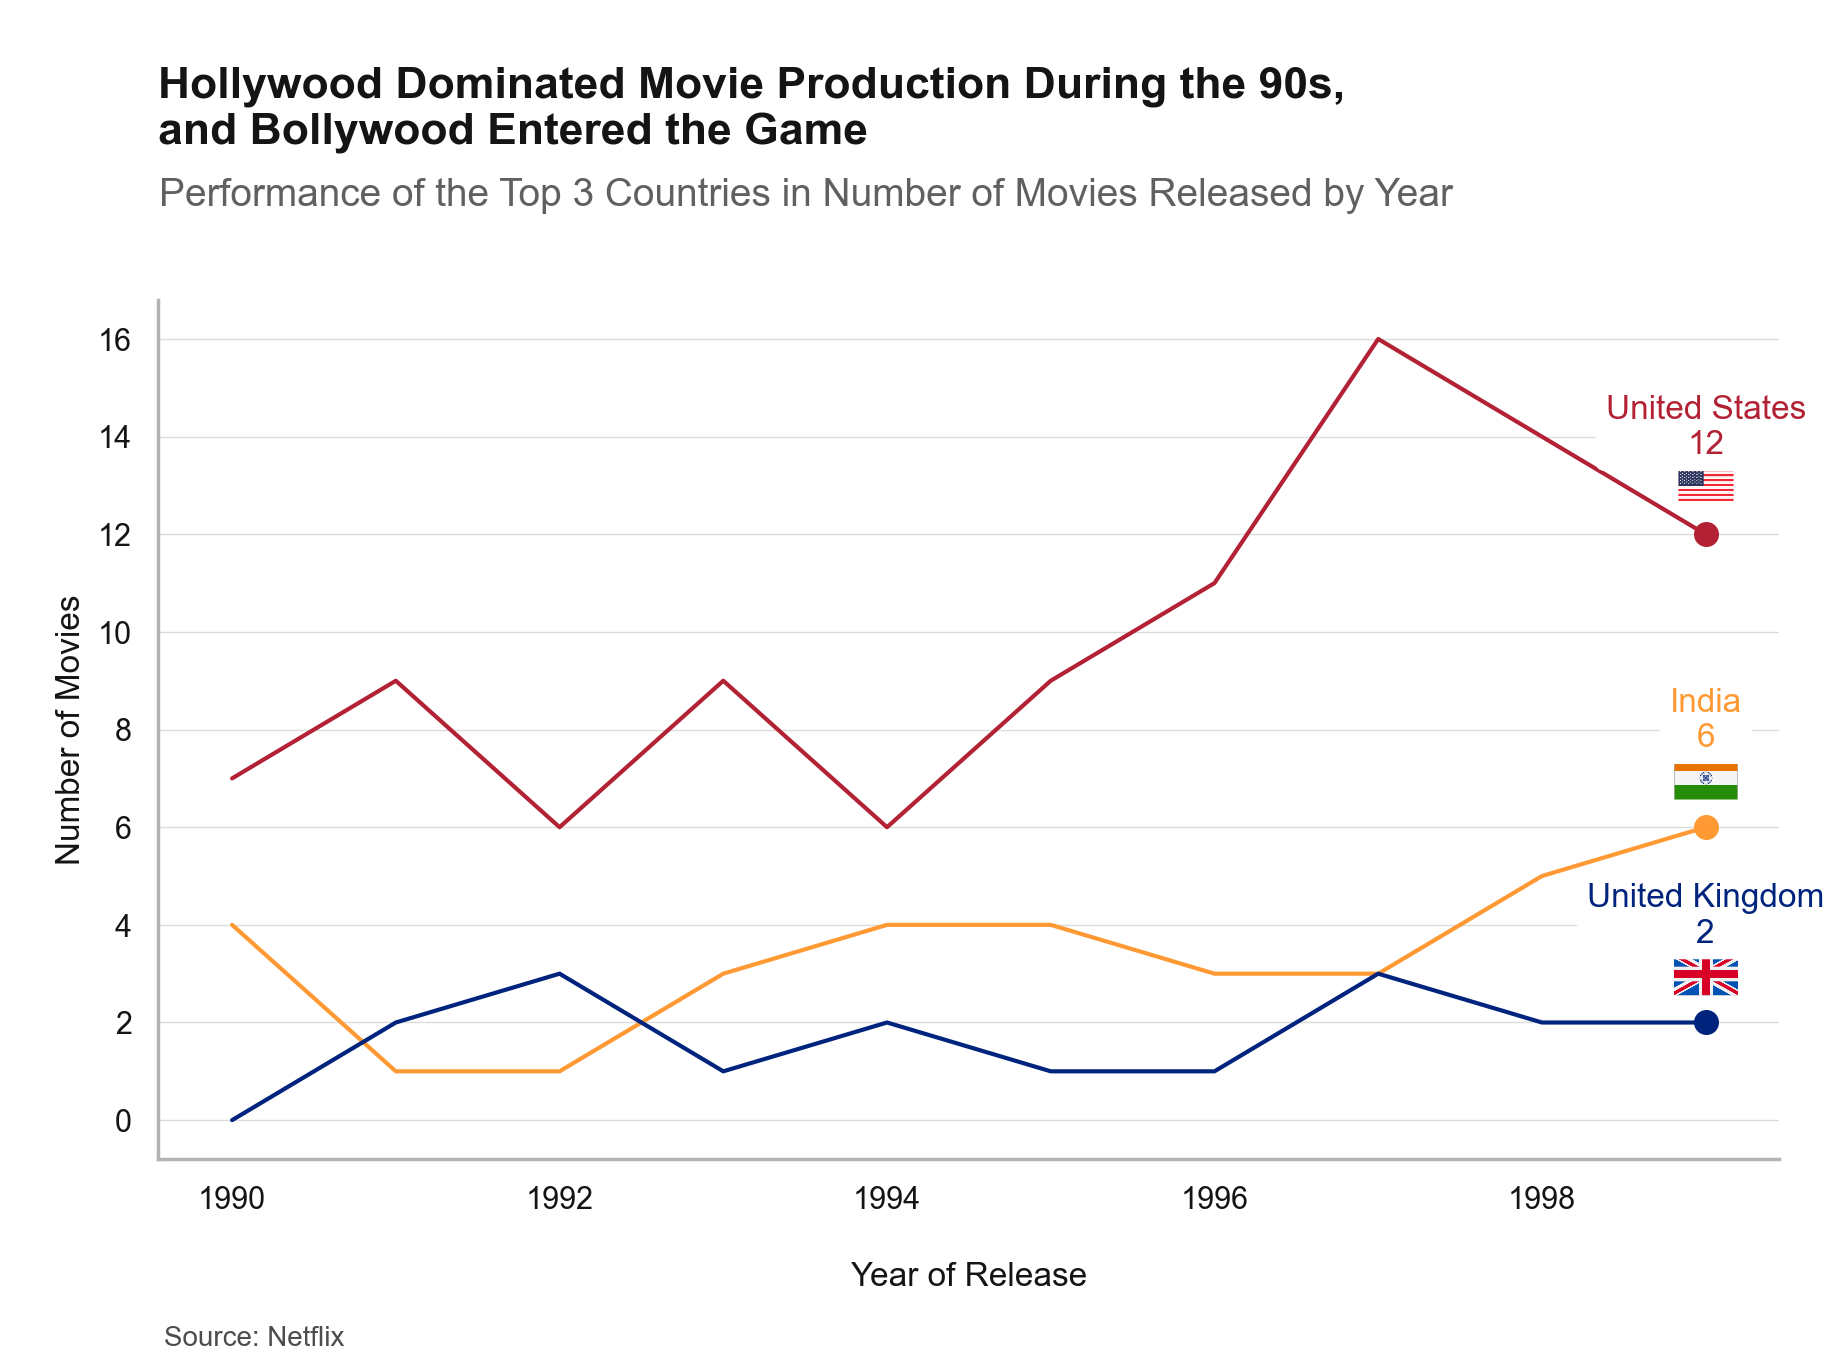

In [46]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

sns.set_theme(style="white")

# Color for the country lines
us_color = '#B22234'
india_color = '#FF9933'
uk_color = '#00247D'

top_3_country_years.plot(kind='line', figsize=(10, 7.5), color=[india_color, uk_color, us_color])

plt.grid(True, axis='y', color='#DCDCDC', linestyle='-', linewidth=0.5)

plt.title('\nHollywood Dominated Movie Production During the 90s, \nand Bollywood Entered the Game\n \n\n', fontsize=16, fontweight='bold', color='#141414', loc='left')

plt.suptitle(
    'Performance of the Top 3 Countries in Number of Movies Released by Year\n', 
    fontsize=14, color='#606060', y=0.794, x=0.471
)

plt.xlabel('\nYear of Release', fontsize=12, color='#141414')
plt.ylabel('\nNumber of Movies', fontsize=12, color='#141414')

plt.tick_params(axis='x', colors='#141414')
plt.tick_params(axis='y', colors='#141414')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#B3B3B3')
plt.gca().spines['bottom'].set_color('#B3B3B3')

plt.legend().set_visible(False)

flag_images = {
    'United States': 'us_flag.png',  
    'India': 'india_flag.png',     
    'United Kingdom': 'uk_flag.png'  
}

for j, country in enumerate(top_3_country_years.columns):
    last_year = top_3_country_years.index[-1]
    last_value = top_3_country_years.loc[last_year, country]
    
    flag_img = mpimg.imread(flag_images[country])
    imagebox = OffsetImage(flag_img, zoom=0.09)  
    ab = AnnotationBbox(imagebox, (last_year, last_value + 1), frameon=False)  
    plt.gca().add_artist(ab)

    plt.text(
        last_year, 
        last_value + 1.5,  
        f'{country}\n{last_value}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        color=plt.gca().lines[j].get_color(), 
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
    )

for j, country in enumerate(top_3_country_years.columns):
    last_year = top_3_country_years.index[-1]
    last_value = top_3_country_years.loc[last_year, country]
    plt.plot(last_year, last_value, marker='o', color=plt.gca().lines[j].get_color(), markersize=8)

plt.figtext(0.15, 0.02, 'Source: Netflix', ha='left', va='center', fontsize=10, color='#4D4D4D')
    
plt.tight_layout()

plt.show()

The graph confirms that the U.S. dominated movie production during the 90s, with India also playing a significant role in the total number of movies released throughout the decade.

The U.S. saw a consistent increase in movie releases, though with some instability. A notable surge began in 1994, and the sharp rise from 1996 to 1997 was primarily driven by a significant boost in U.S. releases during that period. From 1997 to 1999, the U.S. experienced a stable phase with a slight decrease in releases. While this dip was noticeable, it didn't significantly alter the overall upward trend. Meanwhile, India exhibited steady growth in movie releases from 1997 to 1999.

The United Kingdom experienced a considerable rise in production compared to its minimal output at the start of the decade. It demonstrated consistent growth with little volatility but did not emerge as a major player like the U.S. or India.

India ended the 90s on a strong note, signaling that Bollywood was beginning to challenge Hollywood's dominance in global movie production.

We’ve gained a good understanding of how the movie industry evolved in the 90s by examining the total number of movies released by year and country. 
Now, let’s dive deeper into the styles of movies that defined this iconic decade. This will provide us with valuable insights and ideas on how to craft a movie with that perfect nostalgic vibe.

## Movies

The period from 1994 to 1999 saw an increase in the number of movies released by the U.S. Let's take a closer look at the movies from this period:

In [14]:
us_movies_1997 = netflix_df[
    (netflix_df['country'] == 'United States') & 
    (netflix_df['release_year'].between(1994, 1999)) & 
    (netflix_df['type'] == 'Movie')
]

us_movies_1997[['title', 'release_year', 'genre', 'director', 'cast']]

,title,release_year,genre,director,cast
6,187,1997,Dramas,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl..."
145,A Night at the Roxbury,1998,Comedies,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ..."
167,A Thin Line Between Love & Hate,1996,Comedies,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ..."
315,American Beauty,1999,Dramas,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes..."
320,American History X,1998,Dramas,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel..."
...,...,...,...,...,...
4322,The Trigger Effect,1996,Thrillers,David Koepp,"Kyle MacLachlan, Elisabeth Shue, Dermot Mulron..."
4347,The Waterboy,1998,Comedies,Frank Coraci,"Adam Sandler, Kathy Bates, Henry Winkler, Fair..."
4428,"To Wong Foo, Thanks for Everything! Julie Newmar",1995,Comedies,Beeban Kidron,"Patrick Swayze, Wesley Snipes, John Leguizamo,..."
4718,Wild Wild West,1999,Action,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm..."


In [35]:
uk_movies_1992_1997 = netflix_df[(netflix_df['country'] == 'United Kingdom') & 
                                 (netflix_df['release_year'].isin([1992, 1997])) & 
                                 (netflix_df['type'] == 'Movie')]

uk_movies_1992_1997[['title', 'release_year', 'genre', 'director', 'cast']]

,title,release_year,genre,director,cast
530,Bean: The Ultimate Disaster Movie,1997,Comedies,Mel Smith,"Rowan Atkinson, Peter MacNicol, John Mills, Pa..."
623,Bill Hicks: Relentless,1992,Stand-Up,Chris Bould,Bill Hicks
1291,Event Horizon,1997,Horror Movies,Paul W.S. Anderson,"Laurence Fishburne, Sam Neill, Kathleen Quinla..."
1780,Howards End,1992,Classic Movies,James Ivory,"Anthony Hopkins, Vanessa Redgrave, Helena Bonh..."
3897,The Crying Game,1992,Classic Movies,Neil Jordan,"Stephen Rea, Miranda Richardson, Forest Whitak..."
4445,Tomorrow Never Dies,1997,Action,Roger Spottiswoode,"Pierce Brosnan, Jonathan Pryce, Michelle Yeoh,..."


## Genres

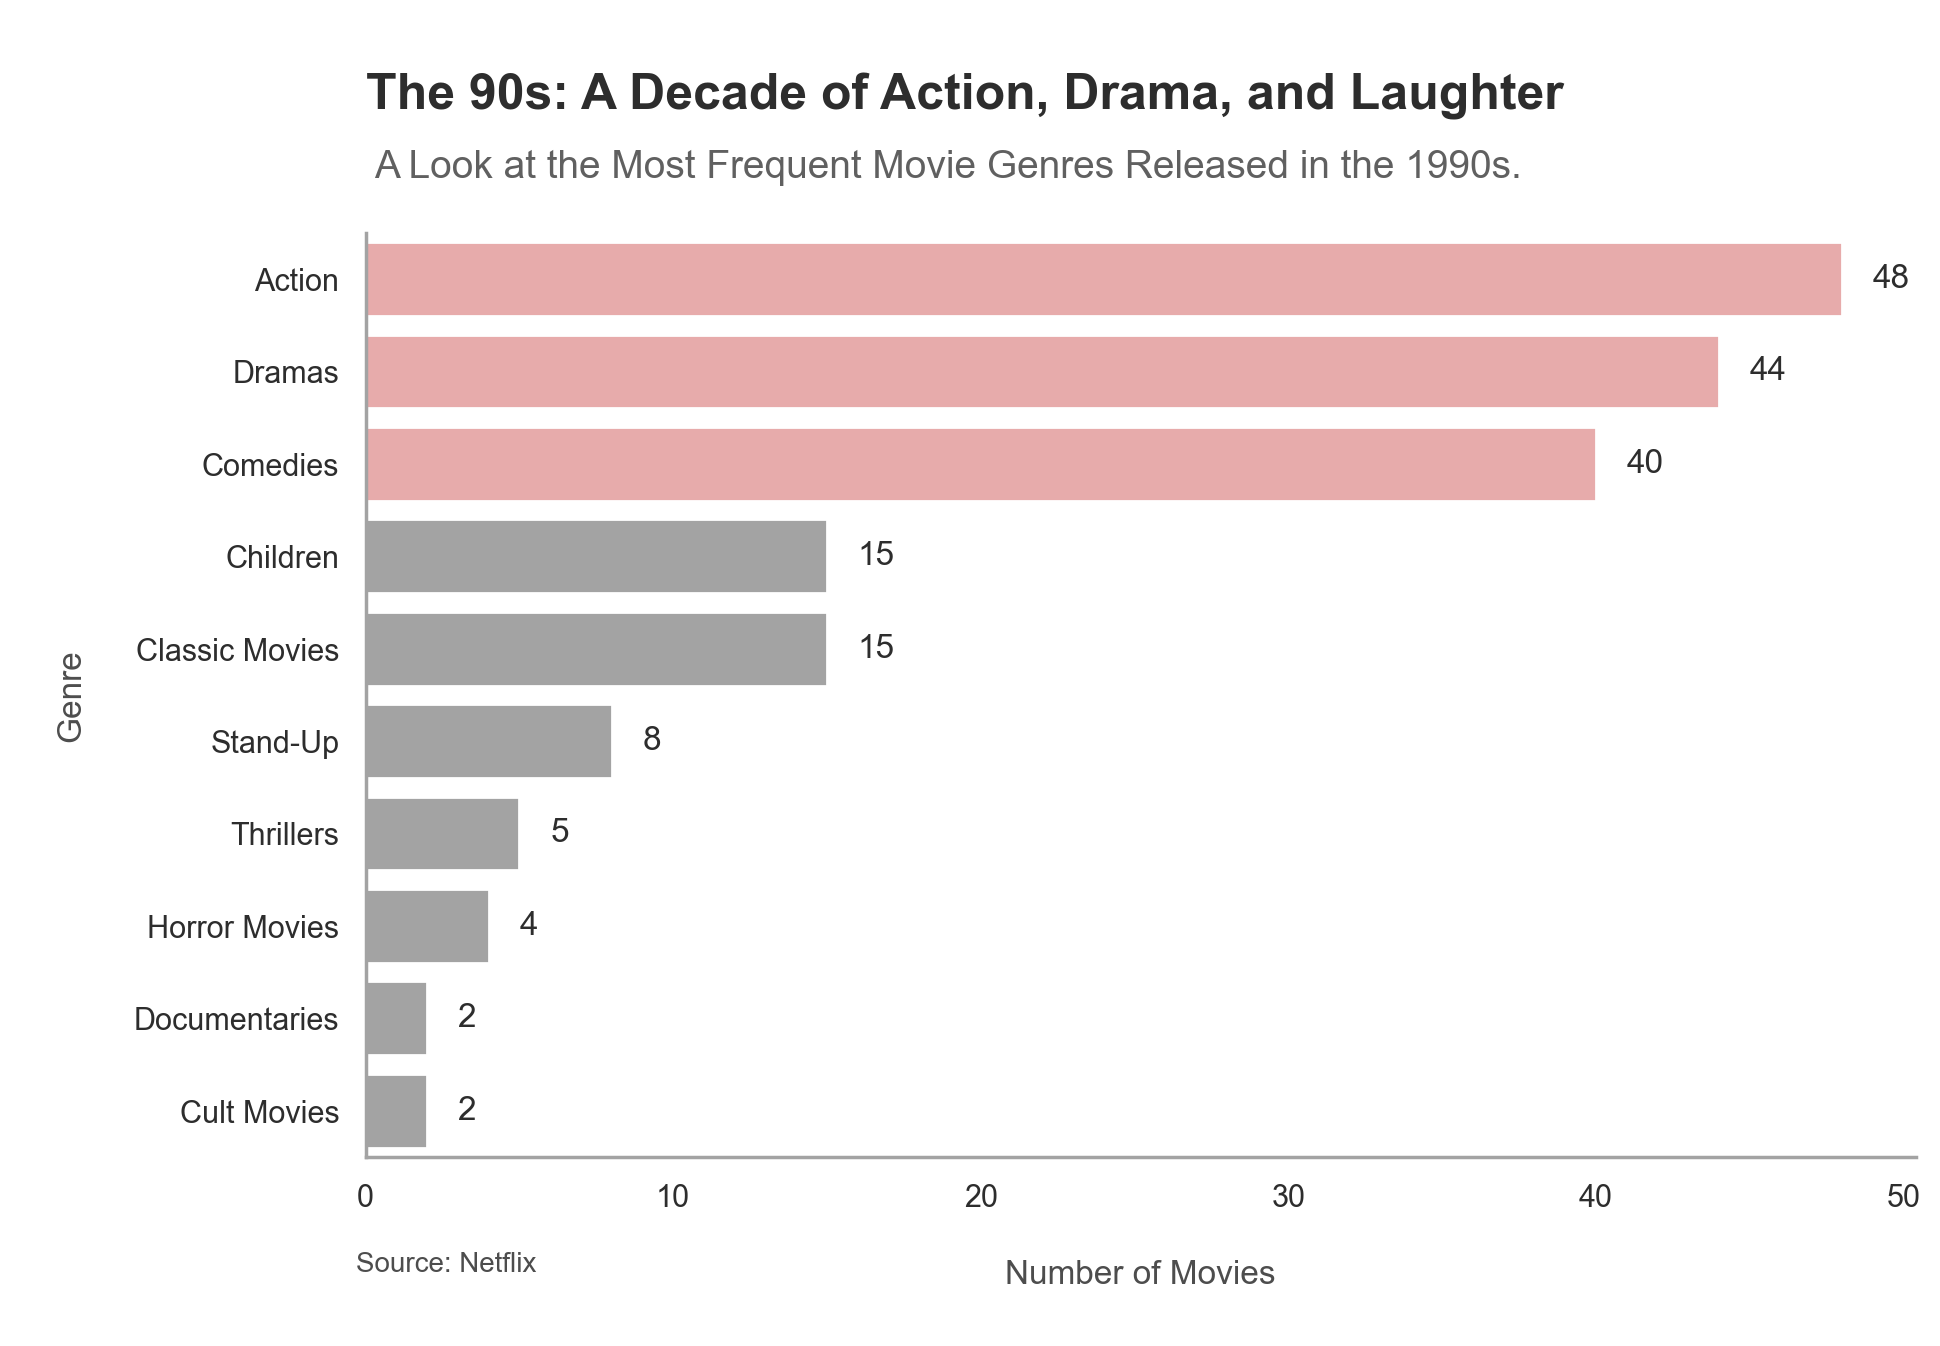

In [36]:
top_genres = movies_90s['genre'].value_counts().head(10)

sns.set_theme(style="white")

plt.figure(figsize=(10, 6))

highlight_color = '#F1A1A1'
other_color = '#A3A3A3'
colors = [highlight_color if i < 3 else other_color for i in range(len(top_genres))]

ax = sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette=colors,
    orient='h'
)

ax.set_title('\nThe 90s: A Decade of Action, Drama, and Laughter\n\n', fontsize=18, loc='left', 
             fontweight='bold', color='#2D2D2D')

plt.suptitle(
    'A Look at the Most Frequent Movie Genres Released in the 1990s.\n', 
    fontsize=14, color='#606060', y=0.95, x=0.416
)

ax.set_xlabel('\nNumber of Movies\n', fontsize=12, color='#4D4D4D')
ax.set_ylabel('\nGenre\n', fontsize=12, color='#4D4D4D')

ax.spines['bottom'].set_color('#A3A3A3')
ax.spines['left'].set_color('#A3A3A3')

ax.xaxis.label.set_color('#4D4D4D') 
ax.yaxis.label.set_color('#4D4D4D')

ax.tick_params(axis='x', colors='#2D2D2D')
ax.tick_params(axis='y', colors='#2D2D2D')

sns.despine(top=True, right=True)

for i, value in enumerate(top_genres.values):
    ax.text(value + 1, i, f'{value}', va='center', fontsize=12, color='#2D2D2D')

plt.figtext(0.12, 0.02, 'Source: Netflix', ha='left', va='center', fontsize=10, color='#4D4D4D')
    
plt.show()

**U.S**

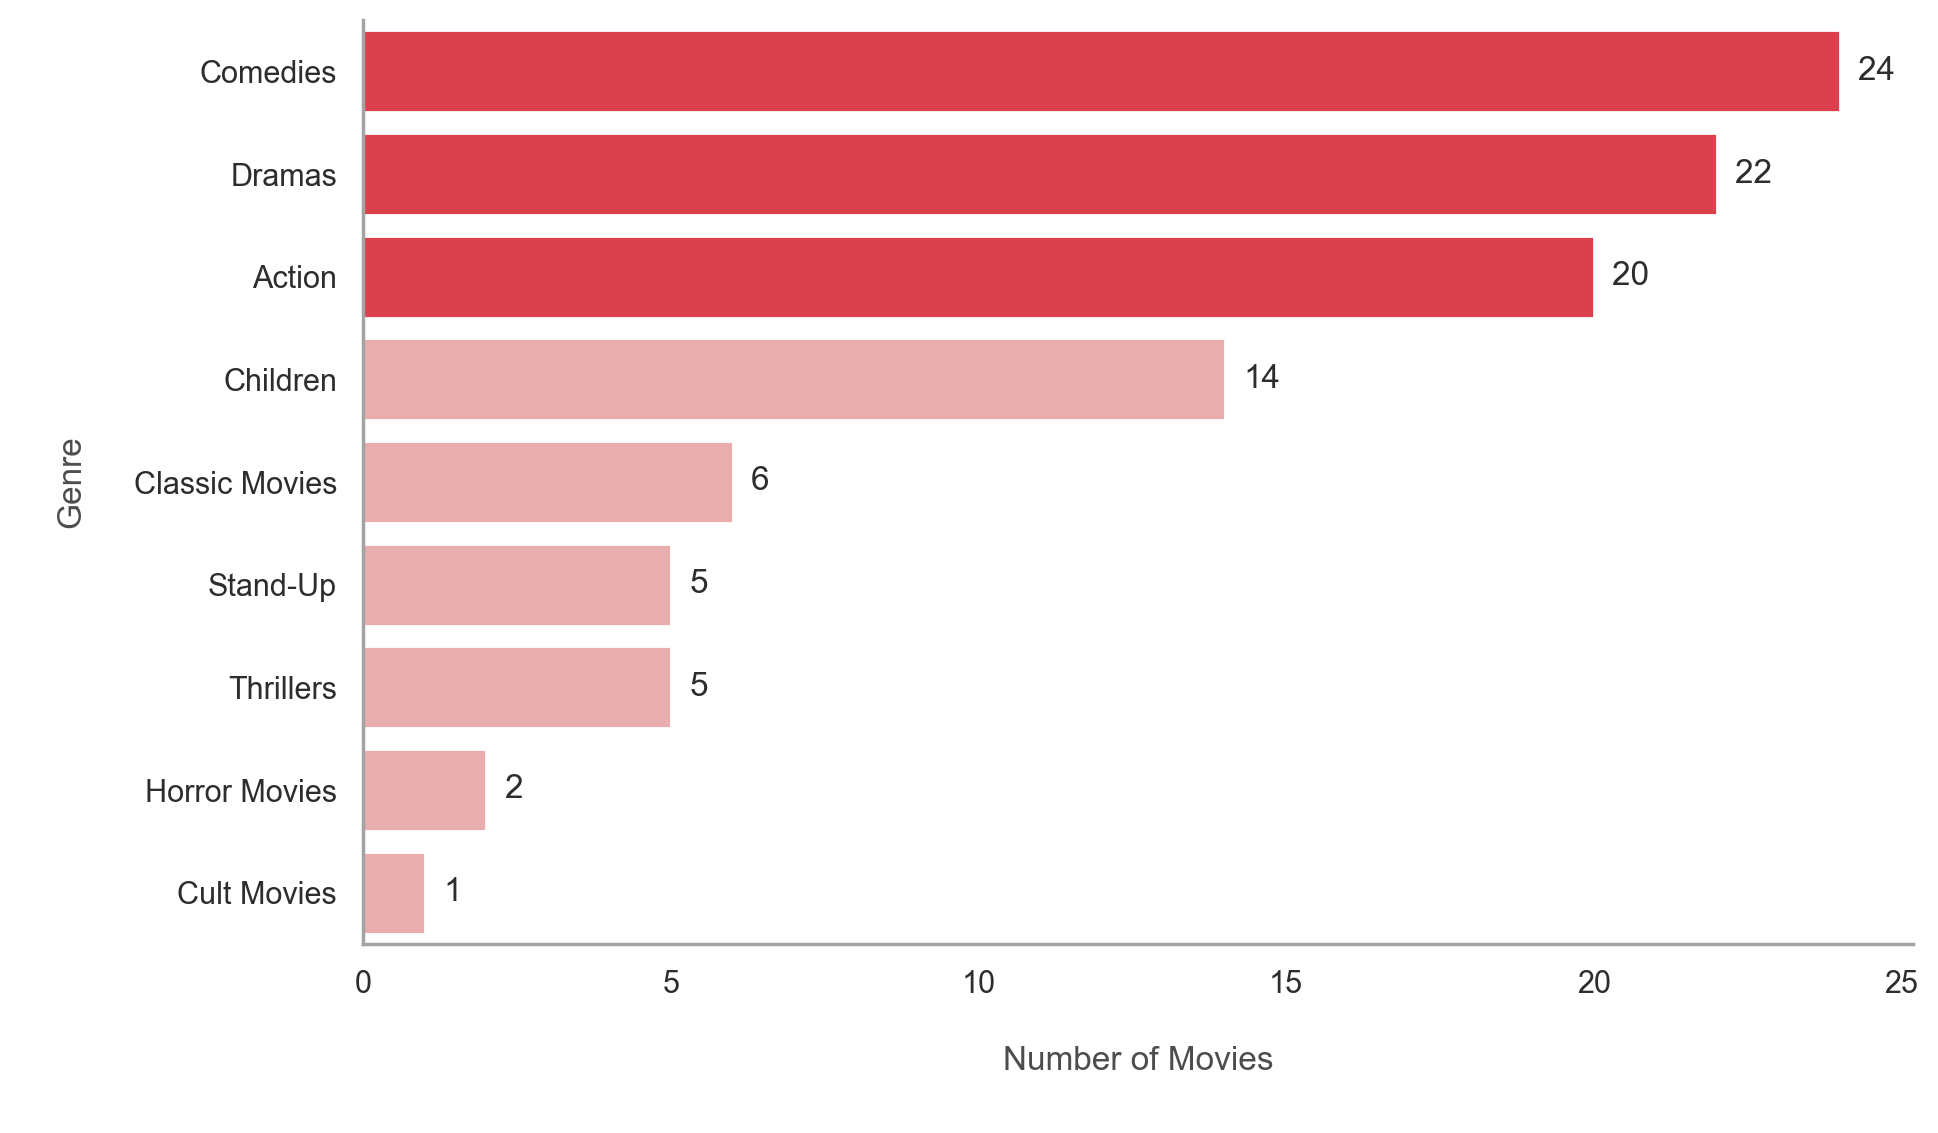

In [37]:
us_genres = movies_90s[movies_90s['country'] == 'United States']['genre'].value_counts().head(10)

sns.set_theme(style="white")

plt.figure(figsize=(10, 6))

highlight_color = '#F32837'  
other_color = '#F4A3A3'      
colors = [highlight_color if i < 3 else other_color for i in range(len(us_genres))]

ax = sns.barplot(
    x=us_genres.values,
    y=us_genres.index,
    palette=colors,
    orient='h'
)

ax.set_xlabel('\nNumber of Movies\n', fontsize=12, color='#4D4D4D')
ax.set_ylabel('\nGenre\n', fontsize=12, color='#4D4D4D')

ax.spines['bottom'].set_color('#A3A3A3')
ax.spines['left'].set_color('#A3A3A3')

ax.xaxis.label.set_color('#4D4D4D') 
ax.yaxis.label.set_color('#4D4D4D')

ax.tick_params(axis='x', colors='#2D2D2D')
ax.tick_params(axis='y', colors='#2D2D2D')

sns.despine(top=True, right=True)

for i, value in enumerate(us_genres.values):
    ax.text(value + 0.3, i, f'{value}', va='center', fontsize=12, color='#2D2D2D')

plt.show()

**India**

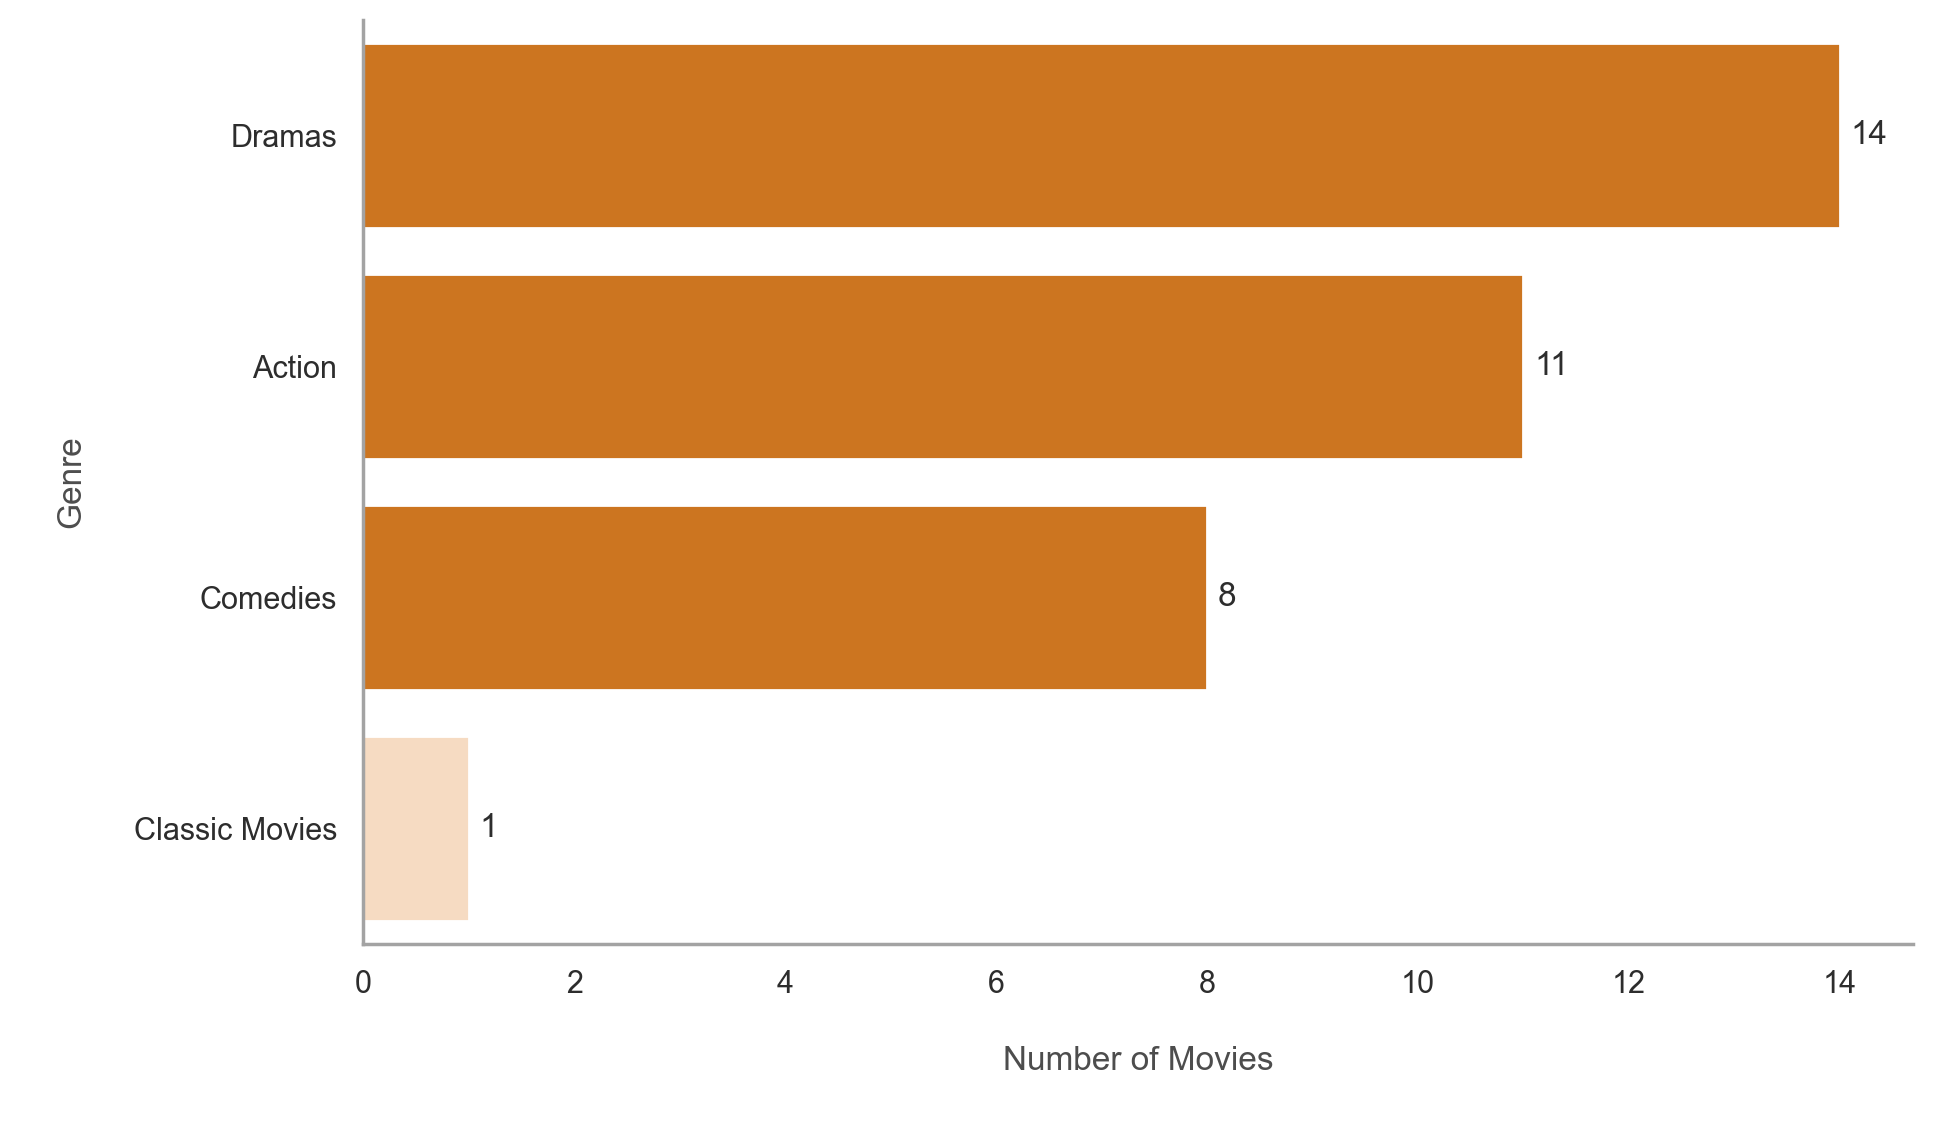

In [38]:
in_genres = movies_90s[movies_90s['country'] == 'India']['genre'].value_counts().head(10)

sns.set_theme(style="white")

plt.figure(figsize=(10, 6))

highlight_color = '#E97403' 
other_color = '#FFDAB9'    
colors = [highlight_color if i < 3 else other_color for i in range(len(in_genres))]

ax = sns.barplot(
    x=in_genres.values,
    y=in_genres.index,
    palette=colors,
    orient='h'
)

ax.set_xlabel('\nNumber of Movies\n', fontsize=12, color='#4D4D4D')
ax.set_ylabel('\nGenre\n', fontsize=12, color='#4D4D4D')

ax.spines['bottom'].set_color('#A3A3A3')
ax.spines['left'].set_color('#A3A3A3')

ax.xaxis.label.set_color('#4D4D4D') 
ax.yaxis.label.set_color('#4D4D4D')

ax.tick_params(axis='x', colors='#2D2D2D')
ax.tick_params(axis='y', colors='#2D2D2D')

sns.despine(top=True, right=True)

for i, value in enumerate(in_genres.values):
    ax.text(value + 0.1, i, f'{value}', va='center', fontsize=12, color='#2D2D2D')

plt.show()

**U.K**

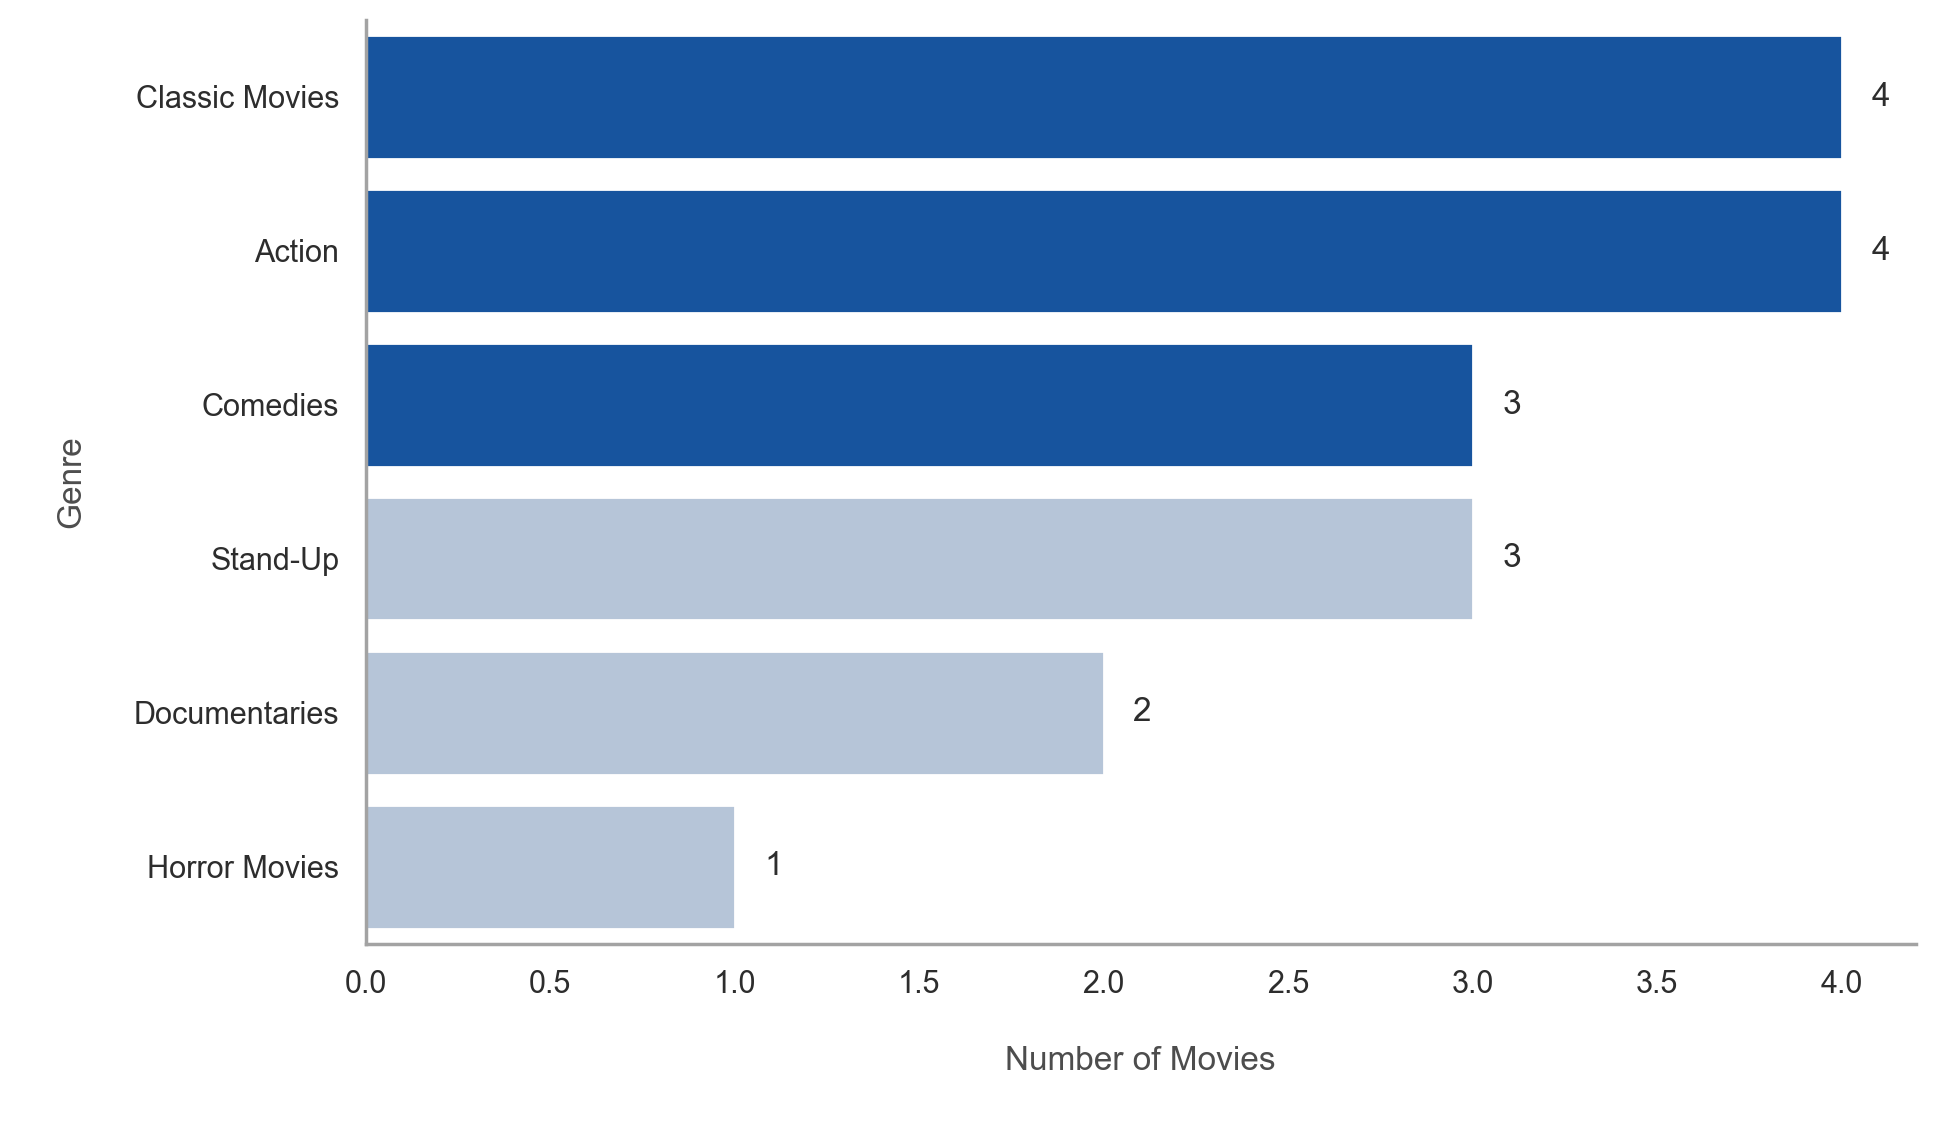

In [39]:
uk_genres = movies_90s[movies_90s['country'] == 'United Kingdom']['genre'].value_counts().head(10)

sns.set_theme(style="white")

plt.figure(figsize=(10, 6))

highlight_color = '#0052B4'  
other_color = '#B0C4DE'      
colors = [highlight_color if i < 3 else other_color for i in range(len(uk_genres))]

ax = sns.barplot(
    x=uk_genres.values,
    y=uk_genres.index,
    palette=colors,
    orient='h'
)

ax.set_xlabel('\nNumber of Movies\n', fontsize=12, color='#4D4D4D')
ax.set_ylabel('\nGenre\n', fontsize=12, color='#4D4D4D')

ax.spines['bottom'].set_color('#A3A3A3')
ax.spines['left'].set_color('#A3A3A3')

ax.xaxis.label.set_color('#4D4D4D') 
ax.yaxis.label.set_color('#4D4D4D')

ax.tick_params(axis='x', colors='#2D2D2D')
ax.tick_params(axis='y', colors='#2D2D2D')

sns.despine(top=True, right=True)

for i, value in enumerate(uk_genres.values):
    ax.text(value + 0.08, i, f'{value}', va='center', fontsize=12, color='#2D2D2D')

plt.show()

## Top Directors

In [41]:
directors = movies_90s['director'].value_counts()

In [42]:
#directors.min()
#directors.max()
directors.mean()
#directors.mode()

1.2364864864864864

In [22]:
usa_movies = movies_90s[movies_90s['country'] == 'United States']

top_usa_directors = usa_movies['director'].value_counts().head(10)
top_usa_directors

Gregory Hoblit       3
Phillip Noyce        2
Walter C. Miller     2
Steven Spielberg     2
Paul Verhoeven       2
Jay Roach            2
Quentin Tarantino    2
Barry Sonnenfeld     2
Garry Marshall       1
Bruce McCulloch      1
Name: director, dtype: int64

In [23]:
india_movies = movies_90s[movies_90s['country'] == 'India']

top_india_directors = india_movies['director'].value_counts().head(10)
top_india_directors

Umesh Mehra           3
Rajkumar Santoshi     3
Mahesh Bhatt          3
Sooraj R. Barjatya    3
Subhash Ghai          3
Rajiv Mehra           2
Indra Kumar           2
David Dhawan          2
Mukul Anand           2
Karan Johar           1
Name: director, dtype: int64

In [24]:
uk_movies = movies_90s[movies_90s['country'] == 'United Kingdom']

top_uk_directors = uk_movies['director'].value_counts().head(10)
top_uk_directors

Chris Bould           2
Mike Rossiter         1
Mel Smith             1
John Fortenberry      1
Julie Dash            1
Paul W.S. Anderson    1
Mike Newell           1
Martin Campbell       1
James Ivory           1
Nick Broomfield       1
Name: director, dtype: int64

In [40]:
top_directors = movies_90s['director'].value_counts().head(10)
top_directors

Johnnie To            4
Youssef Chahine       3
Umesh Mehra           3
Gregory Hoblit        3
Subhash Ghai          3
Mahesh Bhatt          3
Rajkumar Santoshi     3
Sooraj R. Barjatya    3
David Dhawan          2
Quentin Tarantino     2
Name: director, dtype: int64

## Themes

Let’s explore the most frequently used words in the titles and descriptions of the movies to gain an overview of the main subjects and themes.

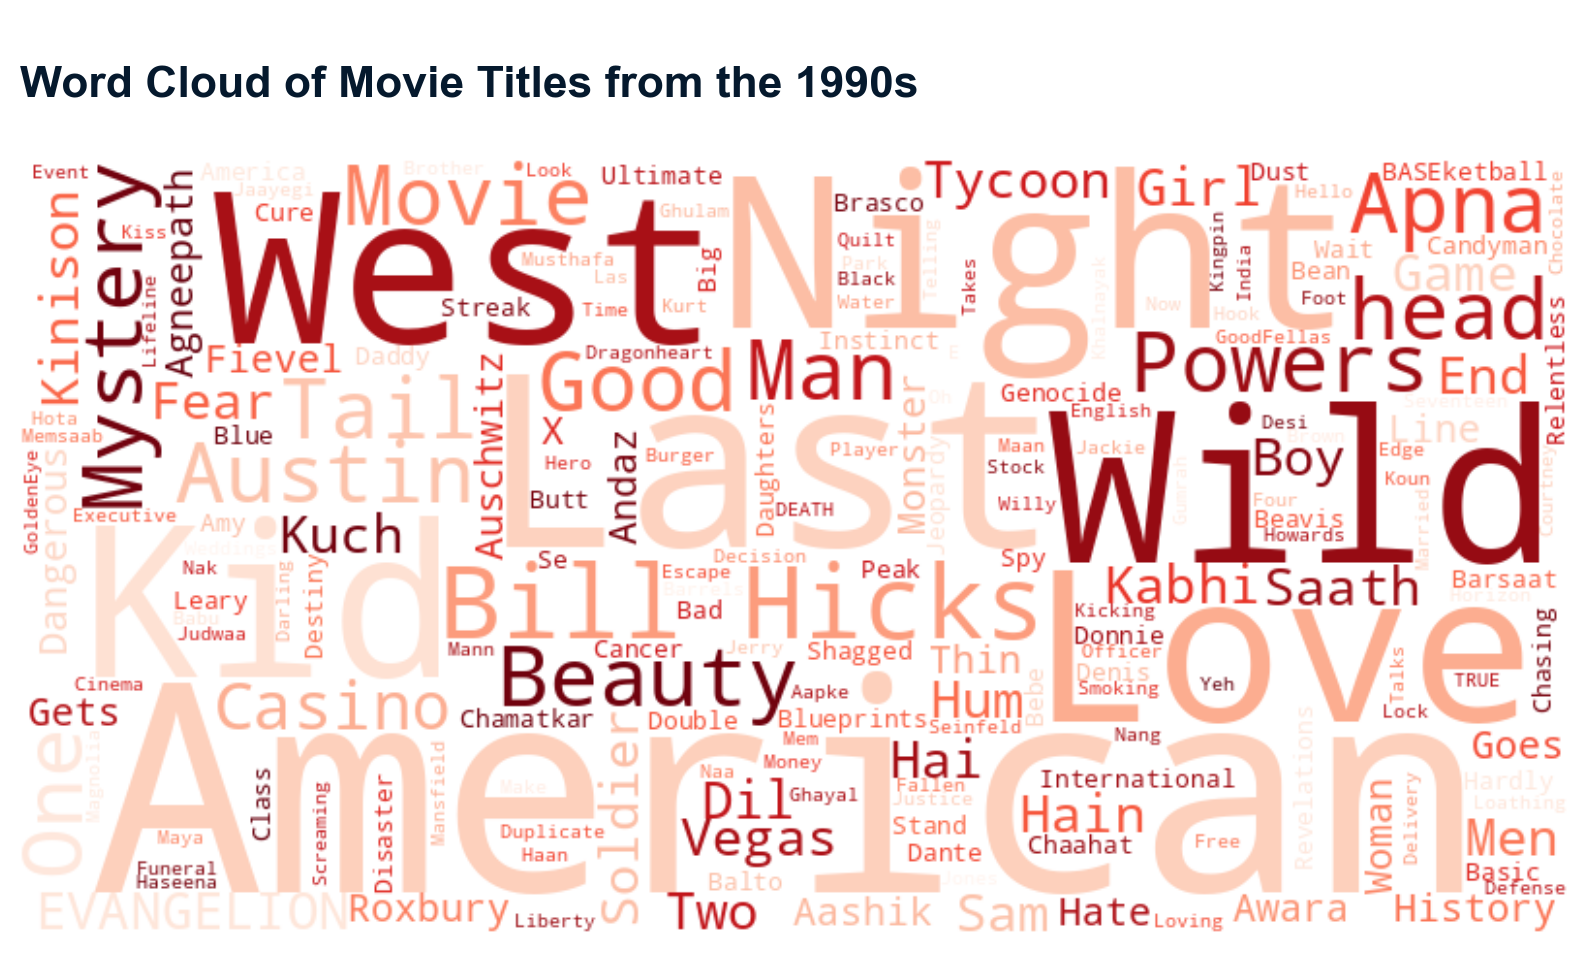

In [25]:
from wordcloud import WordCloud

title_text = ' '.join(movies_90s['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(title_text)

plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\nWord Cloud of Movie Titles from the 1990s\n', fontsize=16, fontweight='bold', loc='left')
plt.show()

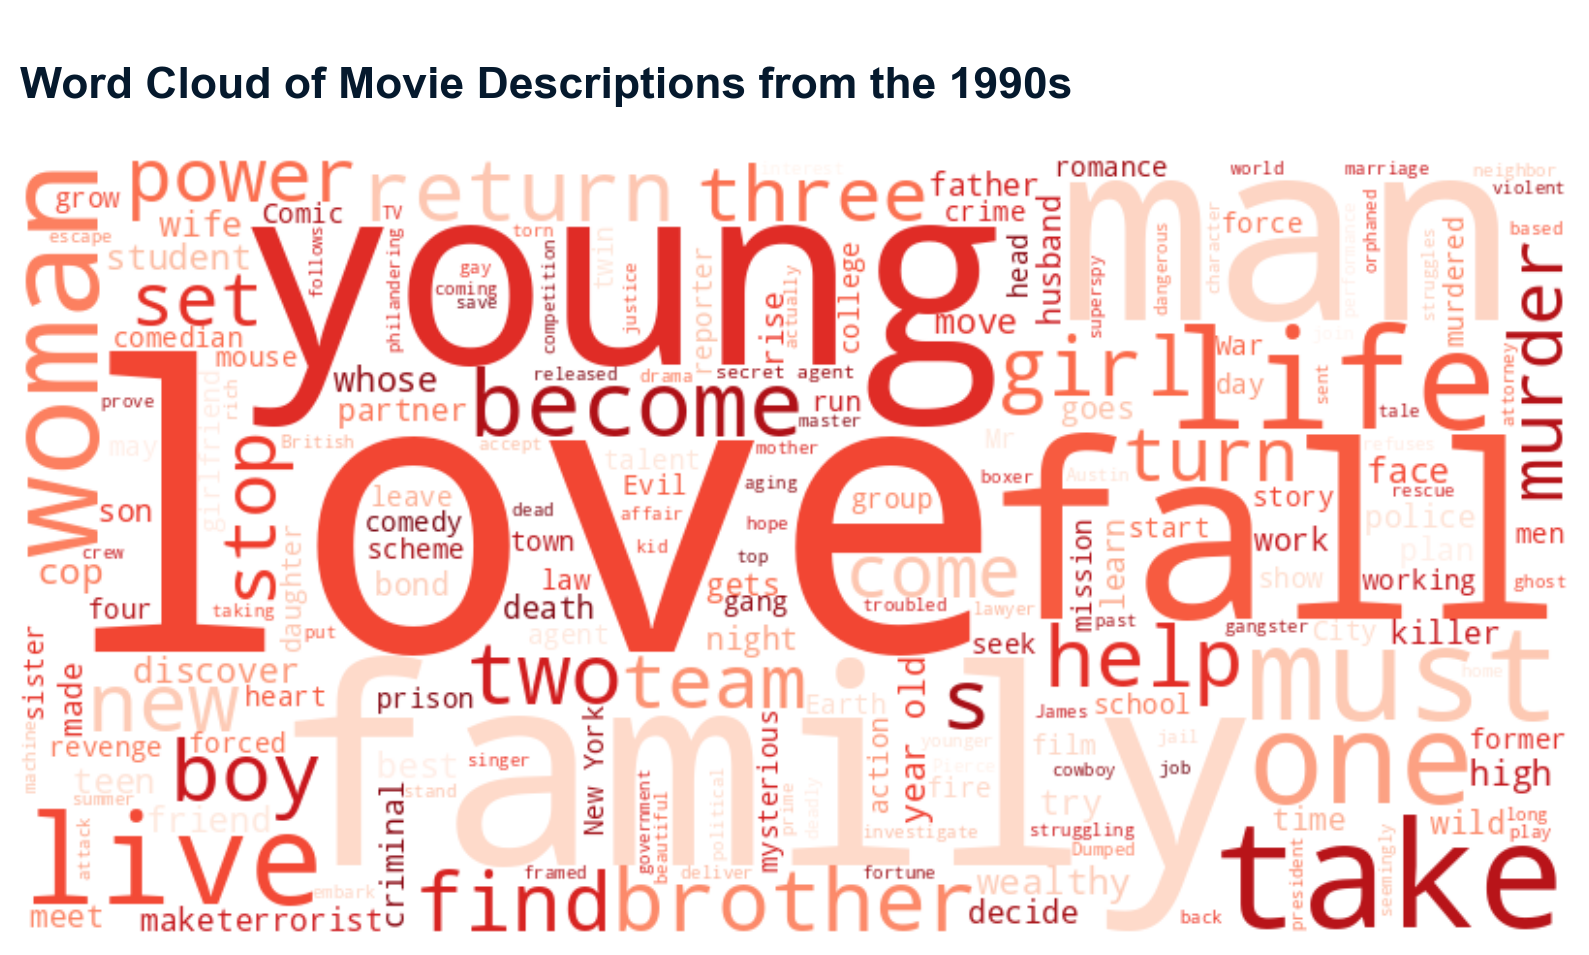

In [26]:
from wordcloud import WordCloud

title_text = ' '.join(movies_90s['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(title_text)

plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\nWord Cloud of Movie Descriptions from the 1990s\n', fontsize=16, fontweight='bold', loc='left')
plt.show()

## Duration

In [27]:
movies_90s['duration'].describe()

count    183.000000
mean     115.120219
std       33.201959
min       28.000000
25%       94.000000
50%      108.000000
75%      136.000000
max      195.000000
Name: duration, dtype: float64

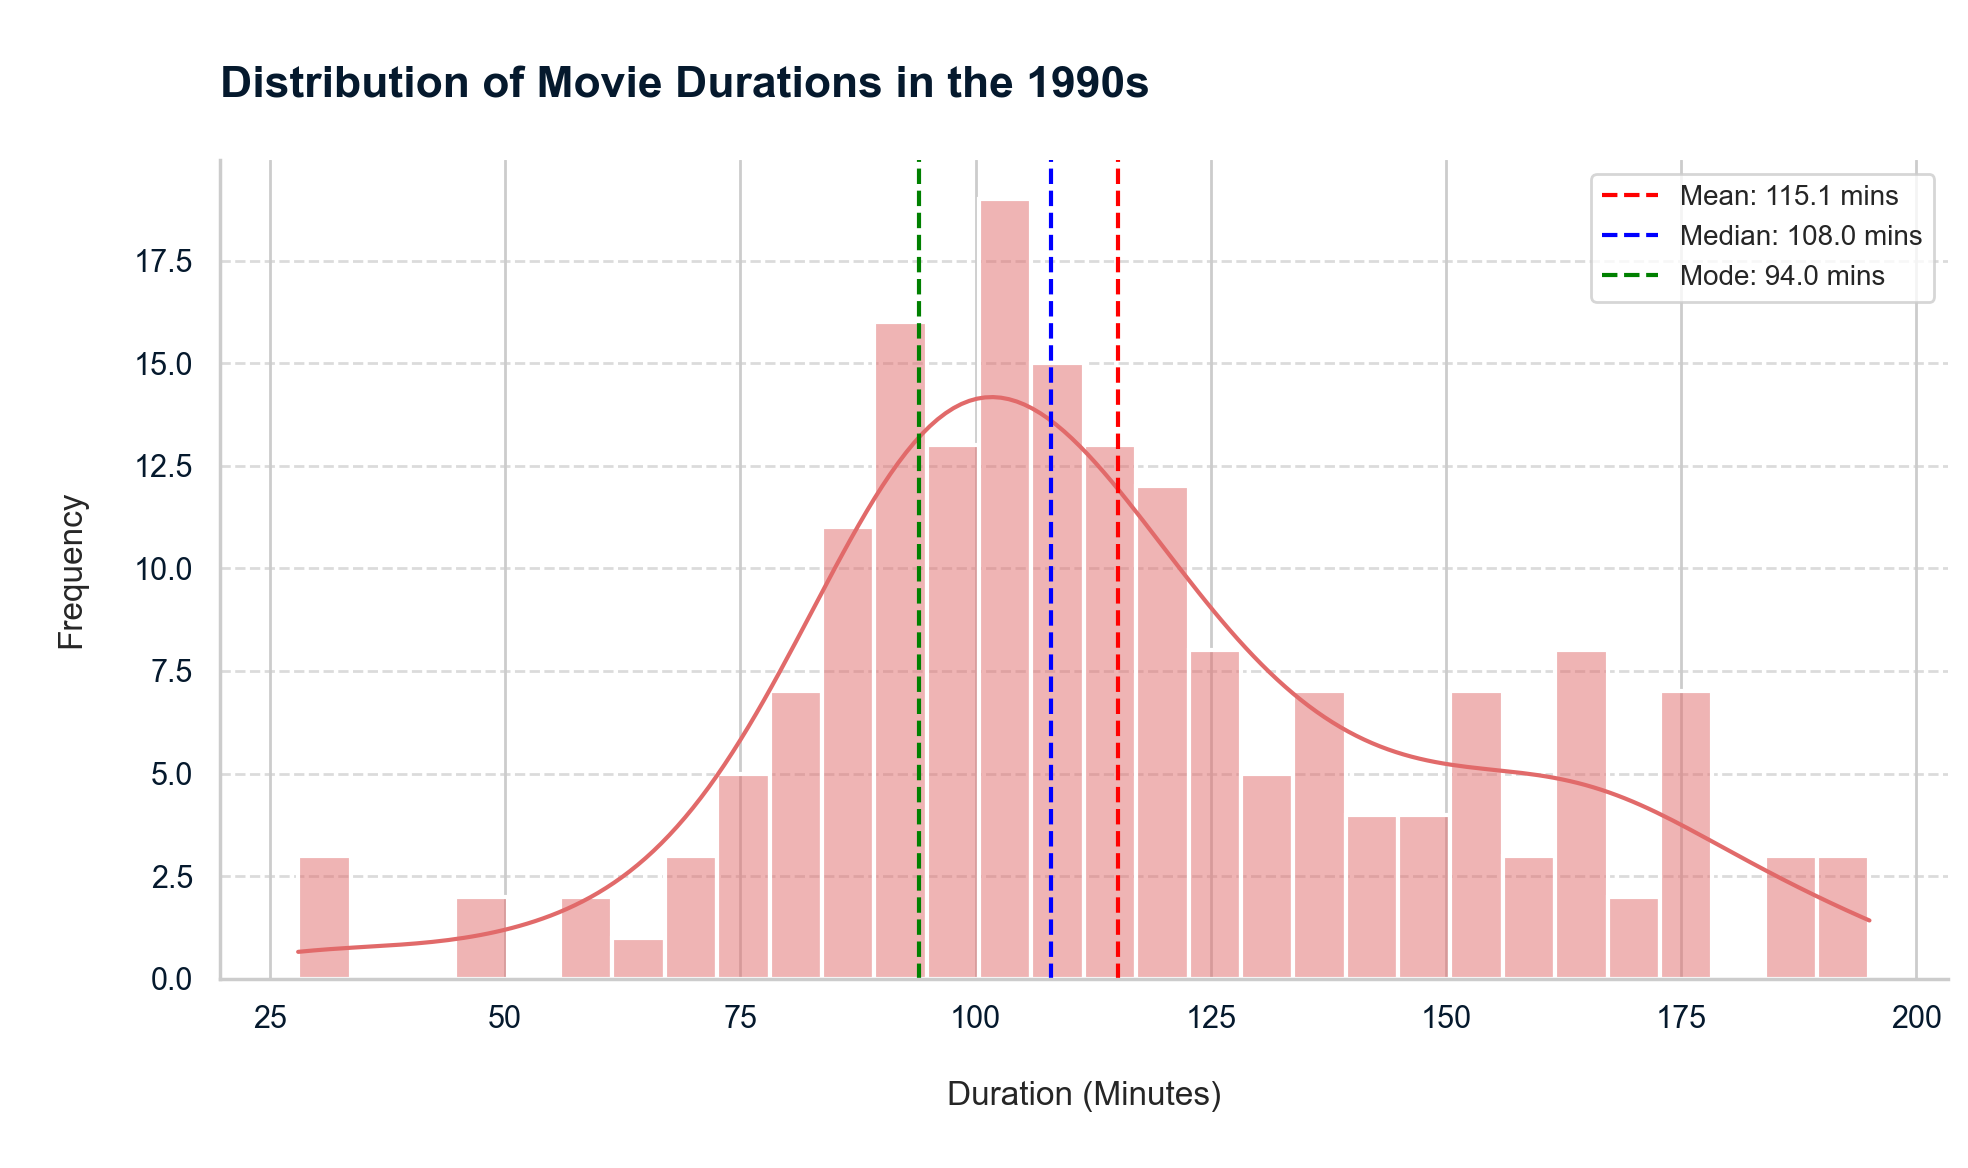

In [45]:
mean_duration = movies_90s['duration'].mean()
median_duration = movies_90s['duration'].median()
mode_duration = movies_90s['duration'].mode().iloc[0]

sns.set_theme(style="whitegrid")  

plt.figure(figsize=(10, 6), tight_layout=True)

ax = sns.histplot(
    data=movies_90s,
    x='duration',
    bins=30,
    #color=sns.color_palette('Reds')[3],  # Use soft pastel colors
    color='#E16A6A',
    kde=True,
    linewidth=1.5,
)

ax.set_title('\nDistribution of Movie Durations in the 1990s\n', fontsize=16, loc='left', fontweight='bold')
ax.set_xlabel('\nDuration (Minutes)\n', fontsize=12)
ax.set_ylabel('\nFrequency\n', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(top=True, right=True)

plt.axvline(mean_duration, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_duration:.1f} mins')
plt.axvline(median_duration, color='blue', linestyle='--', linewidth=1.5, label=f'Median: {median_duration:.1f} mins')
plt.axvline(mode_duration, color='green', linestyle='--', linewidth=1.5, label=f'Mode: {mode_duration:.1f} mins')

plt.legend(fontsize=10)

plt.show()

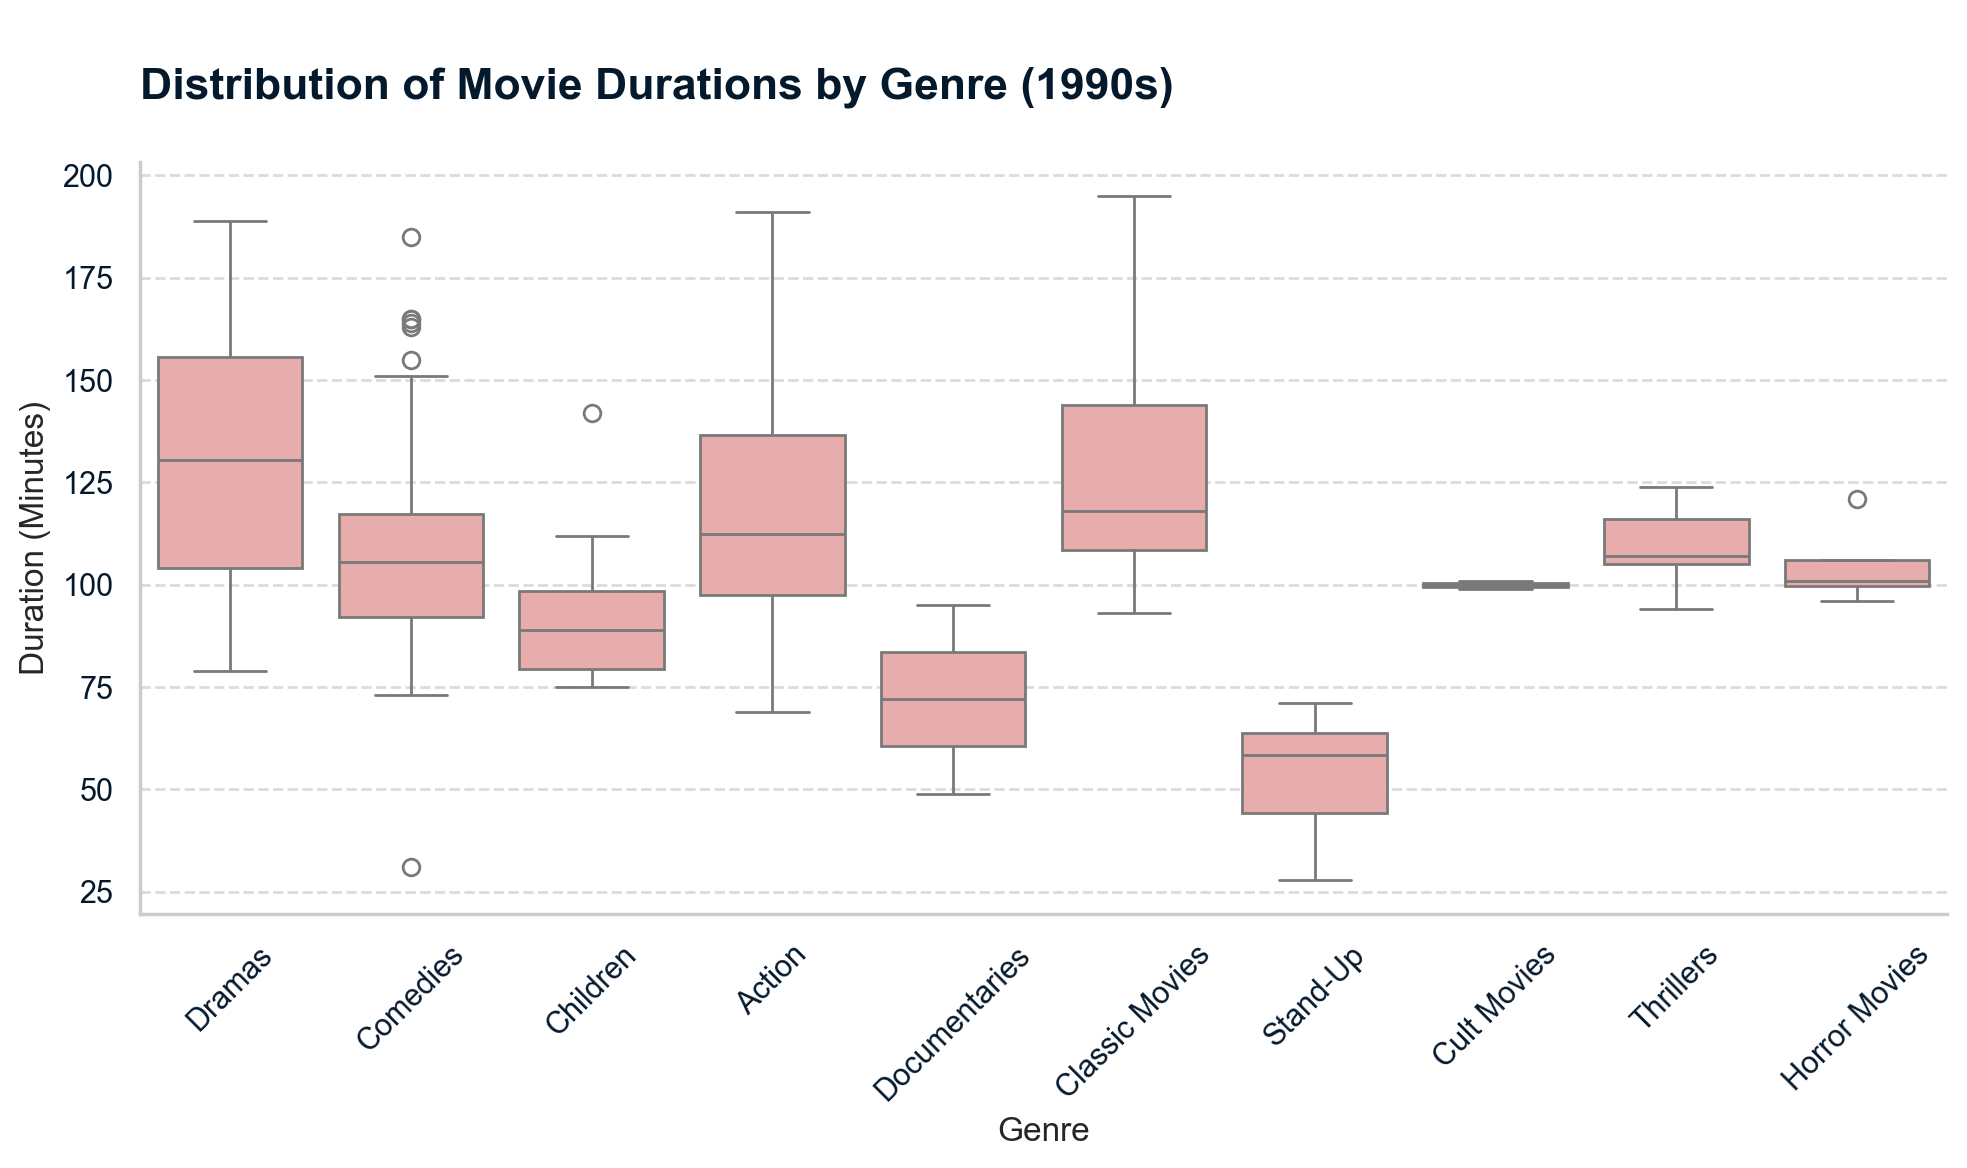

In [44]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6), tight_layout=True)

ax = sns.boxplot(
    x='genre', 
    y='duration', 
    data=movies_90s, 
    color='#F1A3A3',
)

ax.set_title('\nDistribution of Movie Durations by Genre (1990s)\n', fontsize=16, loc='left', fontweight='bold')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Duration (Minutes)', fontsize=12)

plt.xticks(rotation=45)

ax.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(top=True, right=True)

plt.show()

In [29]:
min_duration_movie = movies_90s[movies_90s['duration'] == movies_90s['duration'].min()]
min_duration_movie

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
622,s920,Movie,Bill Hicks: One Night Stand,John Fortenberry,Bill Hicks,United Kingdom,2018-12-31,1991,28,Bill Hicks remembers a wild night in 1989 and ...,Stand-Up


In [30]:
max_duration_movie = movies_90s[movies_90s['duration'] == movies_90s['duration'].max()]
max_duration_movie

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3387,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,195,Oskar Schindler becomes an unlikely humanitari...,Classic Movies
